# **Análisis Exploratorio de Datos (EDA) de Ofertas Inmobiliarias**
Este análisis exploratorio de datos (EDA) se enfoca en comprender las características y tendencias de un conjunto de datos de ofertas inmobiliarias. El objetivo principal es identificar patrones y factores que influyen en los precios y la oferta de propiedades. Para lograrlo, se realizaron los siguientes pasos:

1. **Análisis Descriptivo:** Se generó un resumen de estadísticas para variables clave como precio, metros cuadrados, número de habitaciones, y amenidades, proporcionando una primera visión del comportamiento de los datos.

2. **Visualización de Distribuciones:** Se utilizaron gráficos para explorar las distribuciones de los precios y otras características, ayudando a identificar concentraciones y valores extremos que podrían influir en la interpretación de los datos.

3. **Análisis de Correlaciones:** Se construyó una matriz de correlación para detectar relaciones entre las variables numéricas, enfocándose en cómo el tamaño, las habitaciones y las amenidades pueden afectar el precio de las propiedades.

4. **Pruebas Estadísticas:** Se realizó una prueba ANOVA para determinar si existen diferencias significativas en los precios entre distintos sectores, validando la importancia de la ubicación en la valoración de los inmuebles.

Este EDA busca no solo describir los datos, sino también extraer insights relevantes que puedan ser útiles para el análisis de mercado, la toma de decisiones de inversión, y la identificación de oportunidades en el sector inmobiliario.

### Importamos librerias

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importemos la tabla

In [25]:
# Cargar el dataset
file_path = '../data/processed/cleaned_ofertas_inmobiliarias.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head()



,Precio,Habitaciones,Baños,Parqueos,Sector,Condicion,Uso Actual,mt2,Piso/Nivel,Ascensor,Edificable,Agno Construccion,Planta Electrica,Seguridad 24 Horas,Control de Acceso,Piscina,Gimnasio,Medio baño
0,950.0,1,2,1,El Millón,Segundo Uso,Residencial,73.0,5.0,True,False,2022,False,False,False,True,True,False
1,10640.0,4,4,5,Av. Anacaona,Segundo Uso,Residencial,611.0,9.0,True,False,2020,True,True,True,True,True,True
2,10640.0,3,4,4,Av. Anacaona,Segundo Uso,Residencial,598.0,9.0,True,False,2020,True,True,True,True,True,True
3,10640.0,3,4,2,Av. Anacaona,Segundo Uso,Residencial,598.0,9.0,True,False,2020,True,True,True,True,True,True
4,10640.0,4,4,4,Av. Anacaona,Nueva,Residencial,615.0,14.0,True,False,2023,True,True,True,True,False,True


## Análisis Descriptivos

### Análisis descriptivo de las variables numéricas

In [26]:
# Análisis descriptivo de las variables numéricas
desc_num = df.describe()

desc_num



,Precio,Habitaciones,Baños,Parqueos,mt2,Piso/Nivel,Agno Construccion
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,1796.961973,2.100719,2.031860,1.765673,151.510528,5.692703,2021.601233
std,1444.944274,0.873789,0.769809,0.721918,93.844382,3.369116,3.100391
min,493.000000,1.000000,1.000000,1.000000,45.720000,1.000000,1978.000000
25%,1000.000000,1.000000,1.000000,1.000000,92.000000,4.000000,2021.000000
50%,1350.000000,2.000000,2.000000,2.000000,150.000000,5.000000,2022.000000
75%,2000.000000,3.000000,3.000000,2.000000,169.000000,7.000000,2023.000000
max,10640.000000,10.000000,5.000000,6.000000,869.000000,27.000000,2024.000000


### Análisis descriptivo de las variables categóricas

In [27]:
# Análisis descriptivo de las variables categóricas
desc_cat = df.describe(include=['object'])

desc_cat

,Sector,Condicion,Uso Actual
count,973,973,973
unique,56,4,3
top,Piantini,Segundo Uso,Residencial
freq,122,602,937


### Análisis descriptivo de las variables booleanas

In [28]:
# Selecciona todas las columnas booleanas
boolean_columns = df.select_dtypes(include=['bool']).columns

# Crea un DataFrame para almacenar el conteo de True y False por cada columna booleana
boolean_counts = pd.DataFrame()

# Recorre cada columna booleana y cuenta los valores True y False
for column in boolean_columns:
    boolean_counts[column] = df[column].value_counts()

# Renombra el índice para que se llame "Variables"
boolean_counts.index.name = 'Variables'
boolean_counts = boolean_counts.T


# Agrega una nueva columna con el porcentaje de True
boolean_counts['% True'] = round((boolean_counts[True] / (boolean_counts[True] + boolean_counts[False])) * 100, 1)

# Muestra el conteo de True y False para cada variable booleana
print(boolean_counts)

Variables           True  False  % True
Ascensor             822    151    84.5
Edificable             8    965     0.8
Planta Electrica     716    257    73.6
Seguridad 24 Horas   721    252    74.1
Control de Acceso    533    440    54.8
Piscina              580    393    59.6
Gimnasio             561    412    57.7
Medio baño           698    275    71.7


## Visualizaciones y Gráficos

### Gráficos variables numericas:
Distribuciones y Caja bijotes

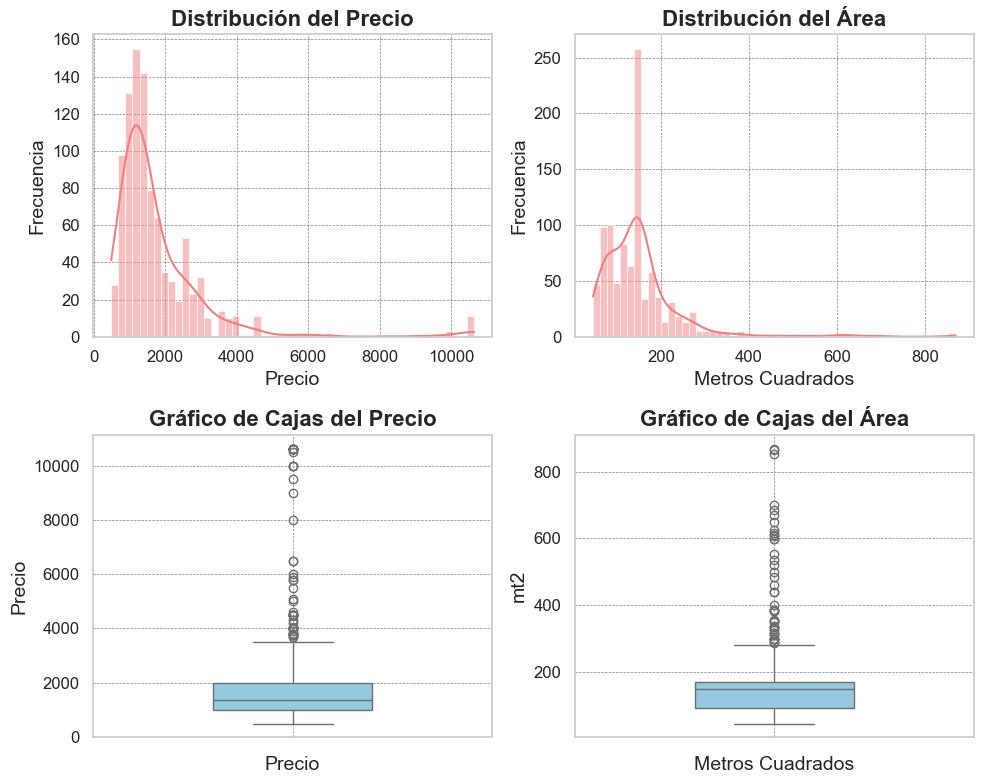

In [29]:
# Aplicar un estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño del gráfico con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Dos filas, dos columnas

# Gráfico de Cajas para el Precio
sns.boxplot(data=df, y='Precio', color='skyblue', width=0.4, flierprops={"marker": "o"}, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Cajas del Precio', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Precio', fontsize=14)
axes[1, 0].set_ylabel('Precio', fontsize=14)

# Gráfico de Cajas para los Metros Cuadrados
sns.boxplot(data=df, y='mt2', color='skyblue', width=0.4, flierprops={"marker": "o"}, ax=axes[1, 1])
axes[1, 1].set_title('Gráfico de Cajas del Área', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Metros Cuadrados', fontsize=14)
axes[1, 1].set_ylabel('mt2', fontsize=14)

# Gráfico de Distribución para el Precio
sns.histplot(data=df, x='Precio', kde=True, color='lightcoral', ax=axes[0, 0])
axes[0, 0].set_title('Distribución del Precio', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Precio', fontsize=14)
axes[0, 0].set_ylabel('Frecuencia', fontsize=14)

# Gráfico de Distribución para los Metros Cuadrados
sns.histplot(data=df, x='mt2', kde=True, color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Distribución del Área', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Metros Cuadrados', fontsize=14)
axes[0, 1].set_ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes y las marcas
for ax in axes.flat:
    ax.grid(color='grey', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Ajustar el layout para que no se superpongan los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Análisis de la Distribución del Precio y Área

El conjunto de gráficos presenta un análisis de la distribución de precios y del área en metros cuadrados de las propiedades:

* Distribución del Precio: Muestra cómo se distribuyen los precios de las propiedades, concentrándose la mayoría en valores más bajos, con una caída rápida a medida que los precios aumentan. Esto sugiere que hay pocas propiedades con precios muy altos.

* Distribución del Área: La mayoría de las propiedades tienen un área menor a 200 m², con pocas propiedades de mayor tamaño. Esto indica que la oferta de inmuebles grandes es limitada.

* Gráfico de Cajas del Precio: Refleja la dispersión de los precios, indicando que la mayoría se encuentra alrededor de los 2000 USD, aunque hay algunos valores más altos que se consideran como atípicos.

* Gráfico de Cajas del Área: Muestra que la mayoría de las propiedades tiene un área alrededor de los 200 m², con algunos valores atípicos de propiedades más grandes.

Estos gráficos ayudan a identificar la concentración de precios y tamaños más comunes en las propiedades y a detectar las excepciones en ambos casos.

#### Cantidad de Habitaciones, Baños y Parqueos

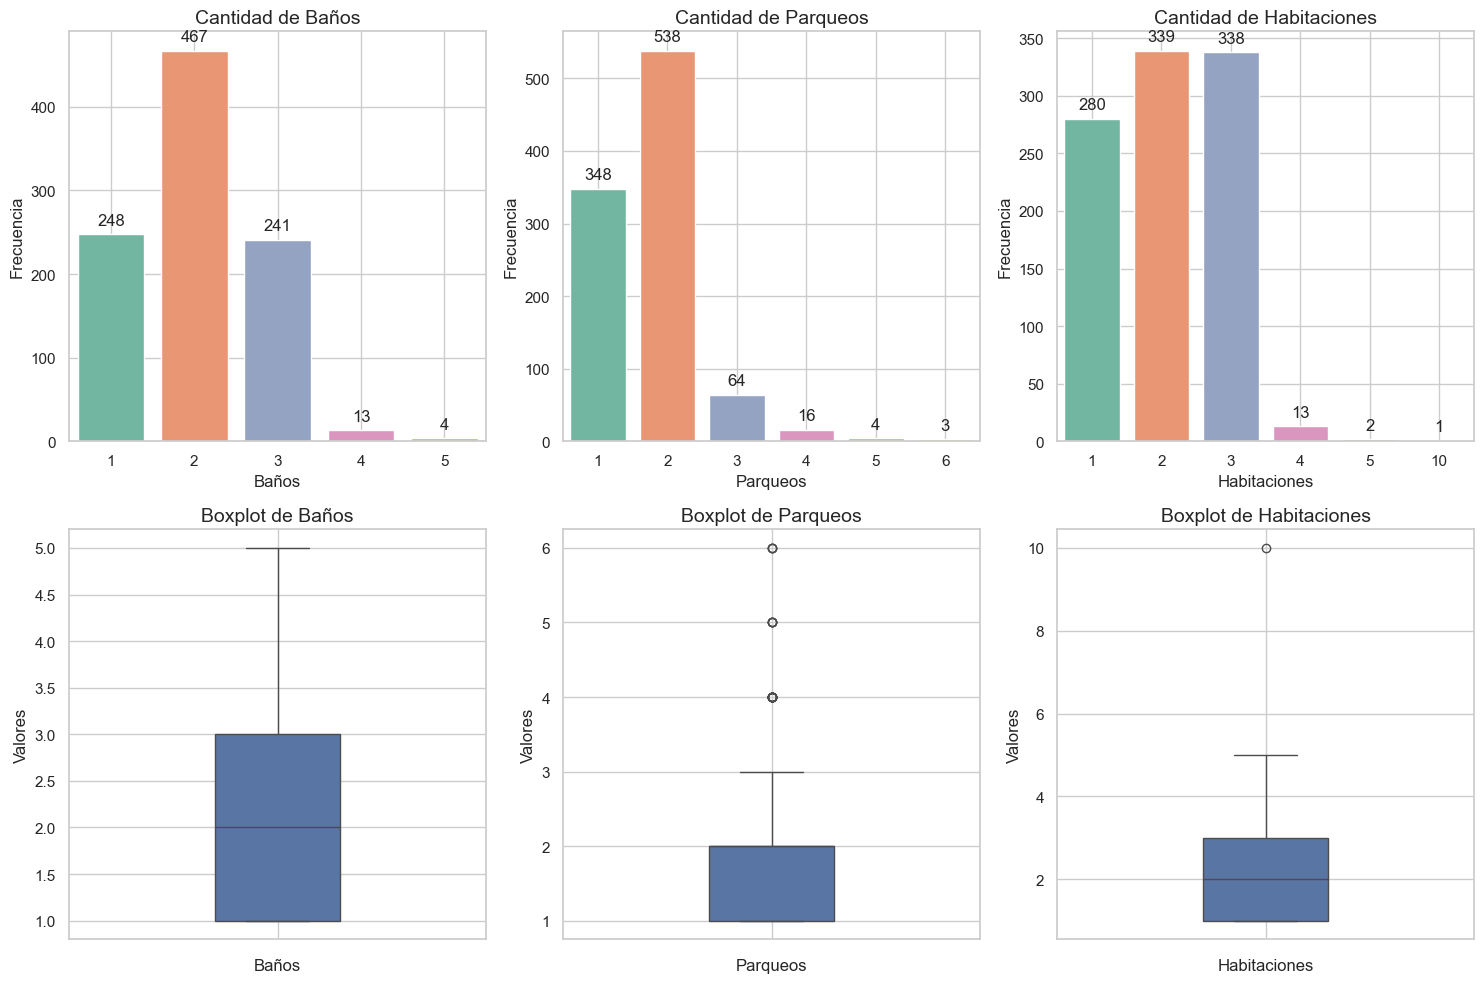

In [30]:
# Seleccionar las columnas numéricas
numerical_columns = ['Baños', 'Parqueos', 'Habitaciones']

# Crear subplots: 2 filas, 3 columnas (primera fila para gráficos de barra, segunda fila para boxplot)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre cada variable para crear los gráficos de barras (primera fila) y boxplots (segunda fila)
for i, column in enumerate(numerical_columns):
    # Gráfico de barras en la primera fila
    sns.countplot(data=df, x=column, ax=axes[0, i],hue=column,legend=False, palette='Set2')
    axes[0, i].set_title(f'Cantidad de {column}', fontsize=14)
    axes[0, i].set_xlabel(column, fontsize=12)
    axes[0, i].set_ylabel('Frecuencia', fontsize=12)
    axes[0, i].grid(True)
    
    # Añadir las etiquetas con la cantidad en cada barra
    for p in axes[0, i].patches:
        axes[0, i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Boxplot en la segunda fila
    sns.boxplot(data=df, y=column, ax=axes[1, i], width=0.3)
    axes[1, i].set_title(f'Boxplot de {column}', fontsize=14)
    axes[1, i].set_xlabel(column, fontsize=12)
    axes[1, i].set_ylabel('Valores', fontsize=12)
    axes[1, i].grid(True)

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Análisis de Cantidad de Baños, Parqueos y Habitaciones

Este conjunto de gráficos presenta la distribución de la cantidad de baños, parqueos y habitaciones en las propiedades:

* Cantidad de Baños: La mayoría de las propiedades tienen 2 baños, seguidas de aquellas con 1 y 3 baños. Los valores atípicos incluyen propiedades con hasta 5 baños.

* Cantidad de Parqueos: La mayoría de las propiedades tienen 2 parqueos, con una cantidad significativa de propiedades que tienen solo 1. Las propiedades con más de 3 parqueos son menos comunes y se consideran casos atípicos.

* Cantidad de Habitaciones: Las propiedades con 2 o 3 habitaciones son las más comunes, seguidas de aquellas con 1 habitación. Algunas propiedades tienen hasta 10 habitaciones, siendo estas valores extremos.

Los gráficos de caja en la parte inferior muestran la variabilidad en cada categoría, destacando la mediana y los valores extremos. Esto facilita entender la tendencia general y la presencia de propiedades que se desvían del rango común.

#### Cantidad de viviendas por año

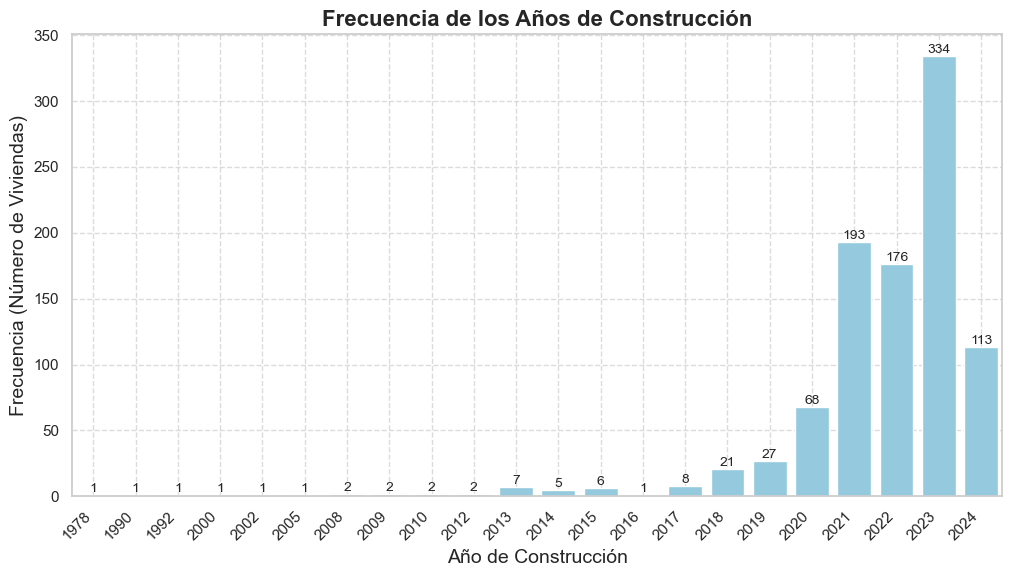

In [31]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras con countplot para contar la frecuencia de 'Agno Construccion'
sns.countplot(data=df, x='Agno Construccion', color='skyblue')

# Añadir etiquetas de los valores sobre las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Añadir título y etiquetas
plt.title('Frecuencia de los Años de Construcción', fontsize=16, fontweight='bold')
plt.xlabel('Año de Construcción', fontsize=14)
plt.ylabel('Frecuencia (Número de Viviendas)', fontsize=14)

# Ajustar rotación de las etiquetas del eje X para legibilidad
plt.xticks(rotation=45, ha='right')

# Mejorar el grid
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Observamos que la distribucion es sesgada a la izquierda, por lo que veamos si hay observaciones antes del 2000 aunque no podamos visualizarlo directamente en la grafica

In [32]:
# Contar los registros antes y después del año 2000
antes_2010 = df[df['Agno Construccion'] < 2010]
despues_2010 = df[df['Agno Construccion'] >= 2010]

print(f"Registros antes del 2000: {antes_2010.shape[0]}")
print(f"Registros después del 2000: {despues_2010.shape[0]}")

Registros antes del 2000: 10
Registros después del 2000: 963


En los datos de años de construccion recomendamos precaucion debido a posibles sesgos en la muestra extraida, como puede ser que solo es presentada las ofertas mas recientes y de casas de nuevo uso.
Tambien, podria deberse a error humano o dato engañoso.

### Categoricas

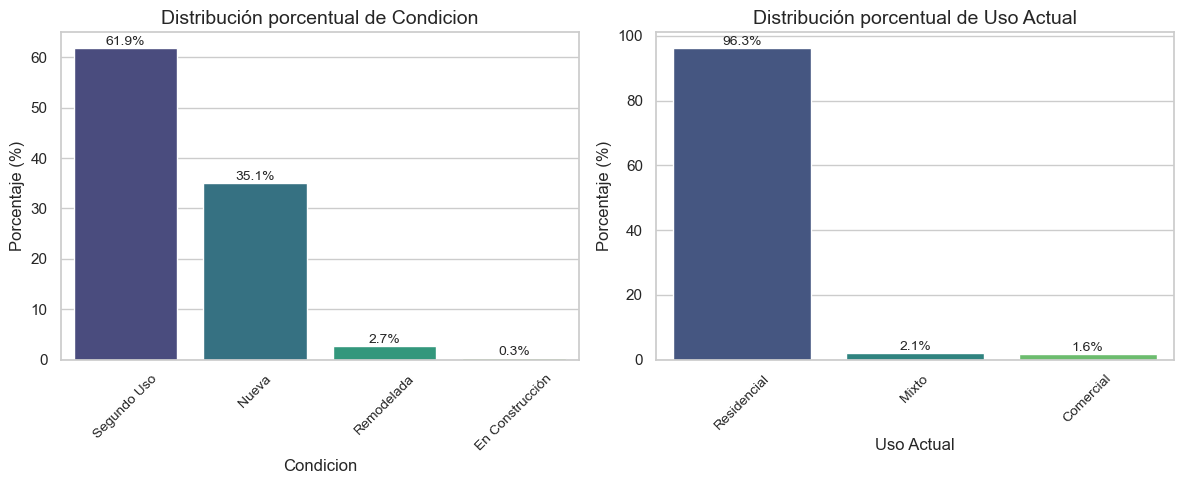

In [33]:
# Para variables categóricas
categorical_columns = ['Condicion', 'Uso Actual']  # Coloca tus columnas categóricas

# Configurar subplots, una fila por cada columna categórica
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(12, 5))  # Una fila y N columnas

# Generar los gráficos en cada subplot
for i, column in enumerate(categorical_columns):
    # Calcula el porcentaje
    percentage = df[column].value_counts(normalize=True) * 100
    
    # Graficar en el subplot correspondiente sin advertencia de palette
    sns.barplot(x=percentage.index, y=percentage.values, ax=axes[i], hue=percentage.index, legend=False,palette='viridis')
    
    # Añadir etiquetas de porcentaje sobre las barras
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)
    
    # Ajustar los títulos y etiquetas
    axes[i].set_title(f'Distribución porcentual de {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Porcentaje (%)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)  # Ajustar la rotación para mejor lectura

# Ajustar el layout para que no se solapen los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Distribución de la Condición y Uso Actual de las Propiedades

* Distribución porcentual de Condición: La mayoría de las propiedades son de segundo uso (61.9%), mientras que un 35.1% son nuevas. Las propiedades remodeladas y en construcción representan una pequeña parte, con 2.7% y 0.3%, respectivamente.

* Distribución porcentual de Uso Actual: El uso predominante de las propiedades es residencial (96.3%). Las propiedades con uso mixto y comercial son escasas, representando solo el 2.1% y 1.6% del total.

Estos gráficos permiten entender la proporción de propiedades según su estado y su uso, destacando la prevalencia de las propiedades residenciales y de segundo uso en el mercado.

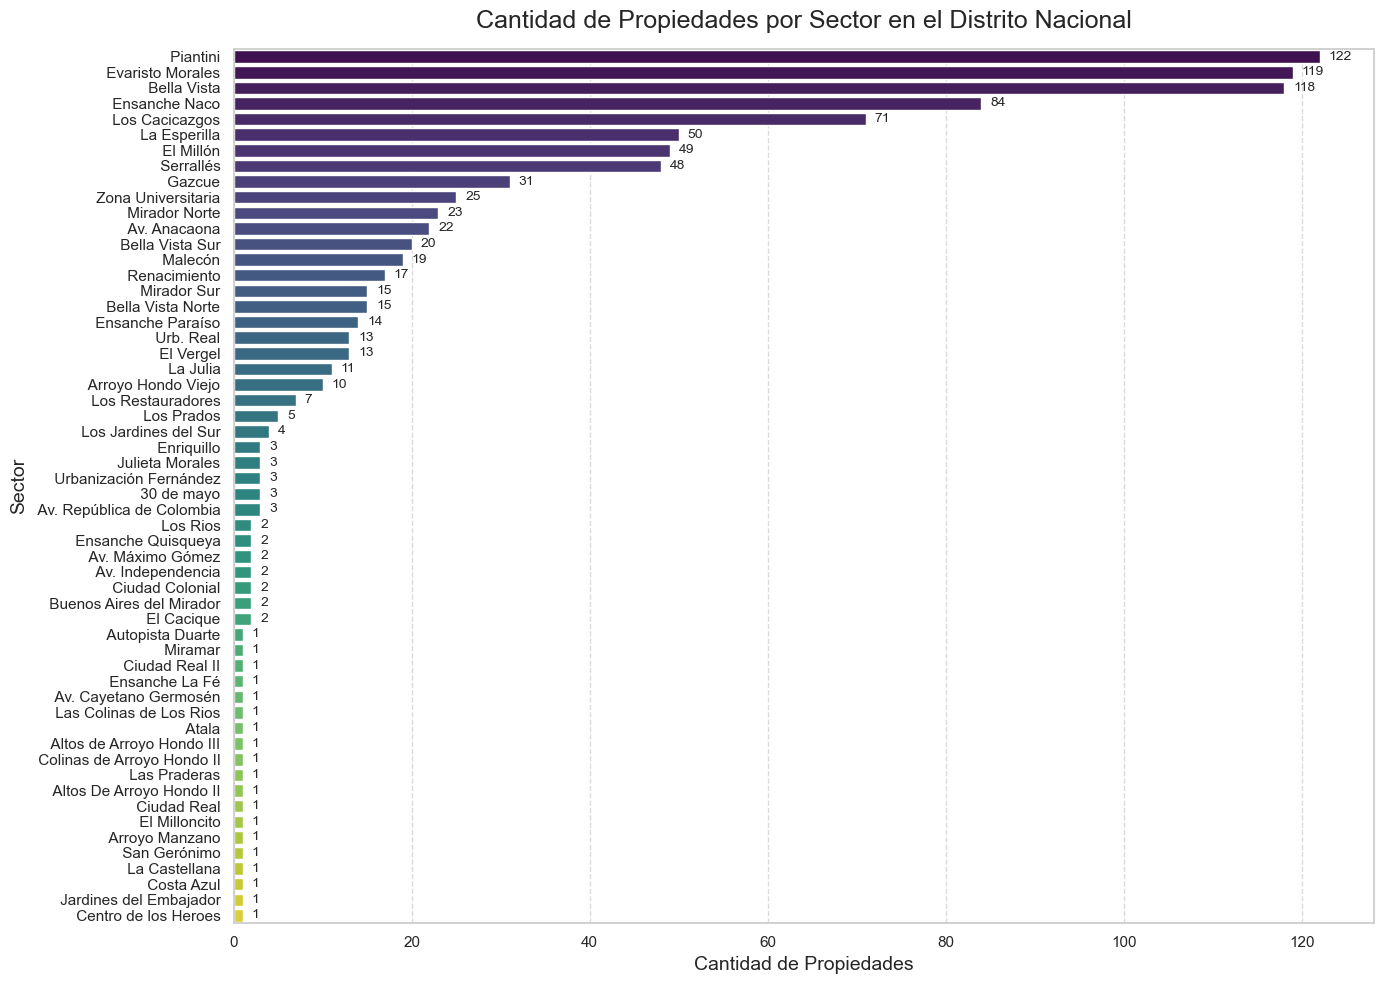

In [34]:
# Calcular la frecuencia de propiedades por sector
sector_count = df['Sector'].value_counts().reset_index()
sector_count.columns = ['Sector', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(14, 10))
sns.barplot(data=sector_count, y='Sector', x='Cantidad',hue='Sector',legend=False, palette='viridis')

# Añadir las etiquetas con el valor en cada barra
for i in range(len(sector_count)):
    plt.text(sector_count['Cantidad'].values[i] + 1, i, str(sector_count['Cantidad'].values[i]), 
             va='center', ha='left', fontsize=10)

# Títulos y etiquetas
plt.title('Cantidad de Propiedades por Sector en el Distrito Nacional', fontsize=18, pad=15)
plt.xlabel('Cantidad de Propiedades', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se solapen los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Cantidad de Propiedades por Sector en el Distrito Nacional

El gráfico muestra la cantidad de propiedades disponibles en distintos sectores del Distrito Nacional. Los sectores con la mayor cantidad de propiedades son Piantini, Evaristo Morales y Bella Vista, que tienen más de 100 propiedades cada uno. En contraste, otros sectores como Centro de los Héroes, Jardines del Embajador y Costa Azul cuentan con solo una propiedad disponible.

### Booleanos


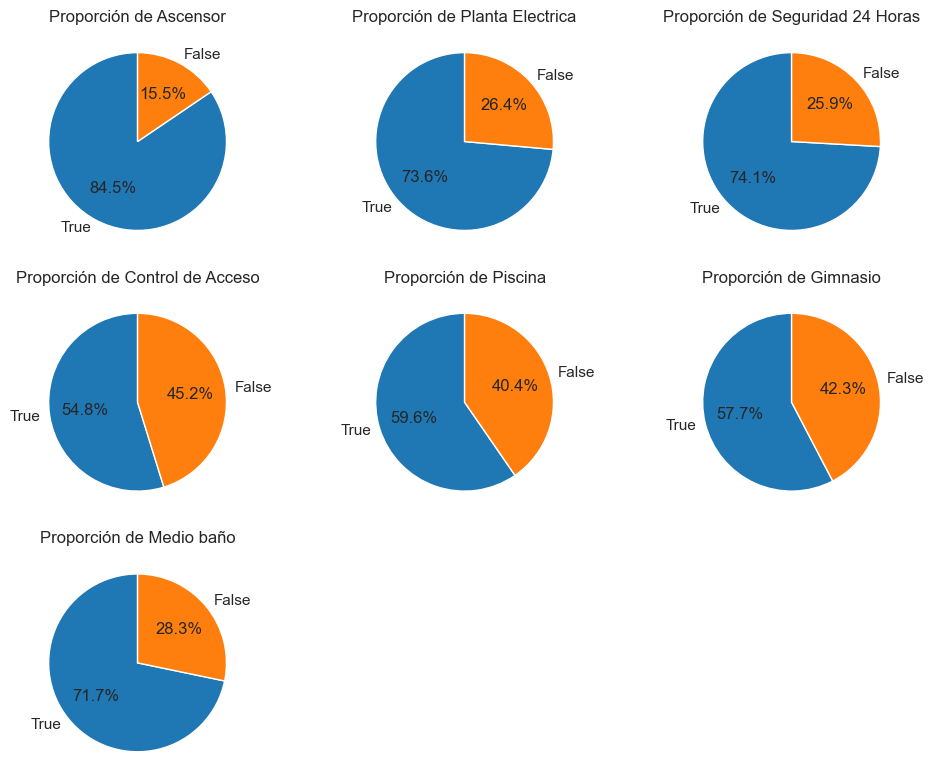

In [39]:


# Para variables booleanas, excluyendo 'Edificable'
boolean_columns = df.select_dtypes(include=['bool']).columns.drop('Edificable')

# Crear subplots con el número adecuado de filas y columnas
fig, axes = plt.subplots(3,3 , figsize=(10, 8))

# Aplanar el array de ejes en caso de que haya más de una fila
axes = axes.flatten()

# Generar los gráficos de pastel en cada subplot
for i, column in enumerate(boolean_columns):
    # Calcula el porcentaje
    count = df[column].value_counts(normalize=True) * 100
    
    # Graficar en el subplot correspondiente
    axes[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
    axes[i].set_title(f'Proporción de {column}')
    
# Eliminar subplots vacíos en caso de que sobren
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para que no se solapen los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Análisis de Proporción de Servicios en las Propiedades

Los gráficos destacan la prevalencia de ciertos servicios en las propiedades. La alta proporción de ascensores (84.5%) y seguridad 24 horas (74.1%) refleja un mercado orientado a la comodidad y la seguridad, probablemente enfocado en segmentos urbanos y de clase media-alta. En contraste, servicios como piscinas (59.6%) y gimnasios (57.7%) muestran una menor presencia, lo cual puede indicar que no todos los proyectos buscan competir en la oferta de amenities adicionales. La significativa presencia de propiedades con planta eléctrica (73.6%) sugiere una adaptación a posibles problemas de suministro energético en la región.

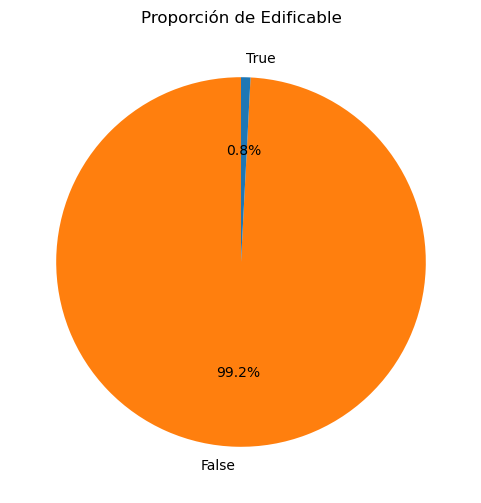

In [28]:
# Gráfico de pastel solo para 'Edificable'
fig, ax = plt.subplots(figsize=(6, 6))

# Calcula el porcentaje para 'Edificable'
count = df['Edificable'].value_counts(normalize=True) * 100

# Graficar el pastel para 'Edificable'
ax.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=['#ff7f0e','#1f77b4'])
ax.set_title('Proporción de Edificable')

# Mostrar el gráfico
plt.show()

Podemos ver que la variable "Edificable" es mayormente 0 o falso, por lo que gran 992 de 1000 ofertas no permiten estas modificaciones

## Correlacion
Correlacion entre variables numericas

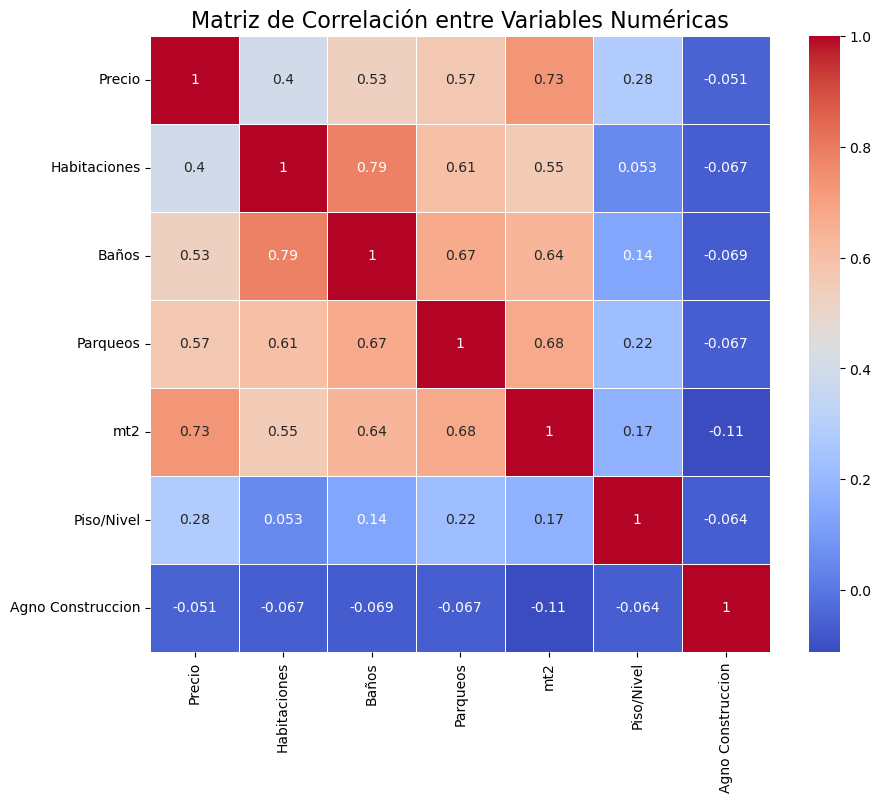

In [8]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Generar una matriz de correlaciones para variables numéricas
correlation_matrix = numerical_df.corr()

# Visualizar la matriz de correlaciones con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

### Version Ampliada


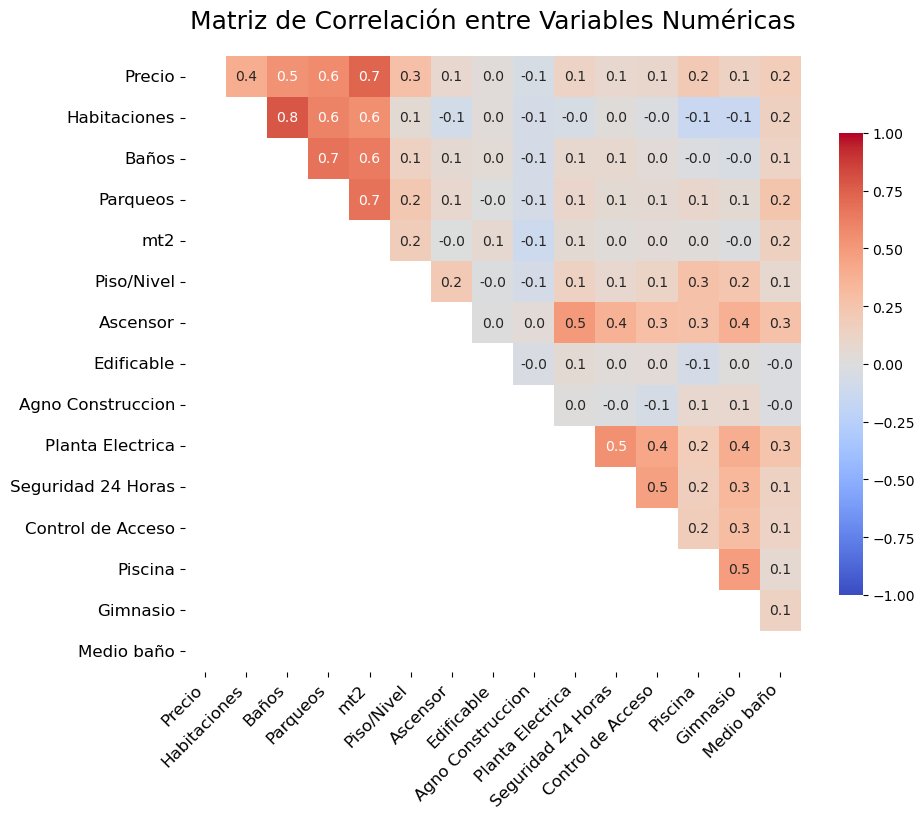

In [29]:
# Mejorar la visualización de la matriz de correlación
plt.figure(figsize=(10, 8))  # Aumentar el tamaño del gráfico
correlation_matrix = df.corr(numeric_only=True)

# Crear una máscara para ocultar la parte superior de la matriz
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Crear un heatmap con mejor contraste de colores y mostrar solo un decimal
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', 
            annot_kws={"size": 10}, linewidths=0, linecolor='black', 
            cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1, mask=mask, square=True)

# Mejorar el título y el tamaño de las etiquetas
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

plt.show()

Interpretación de la Matriz de Correlación

La matriz de correlación muestra cómo las variables numéricas del dataset se relacionan con el precio:

* Precio y mt2 (0.6): Relación positiva fuerte, indicando que a mayor tamaño, mayor precio.
* Precio y Habitaciones (0.4): Relación moderada, más habitaciones suelen asociarse a precios más altos.
* Precio y Baños (0.3): Relación positiva, pero menos relevante.
  
Las variables "Piso/Nivel" y "Ascensor" muestran correlaciones más bajas, sugiriendo menor impacto directo en el precio.

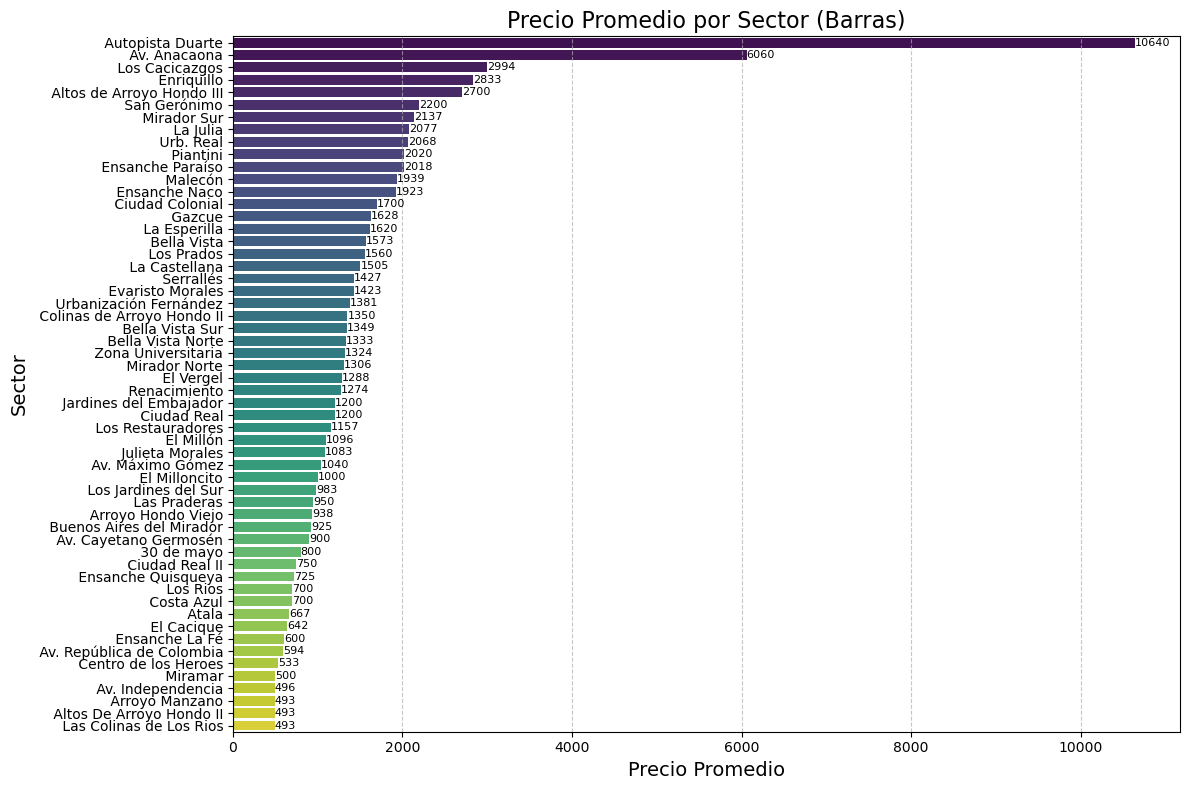

In [45]:
# Crear pivot table con el precio promedio por sector
sector_pivot = df.pivot_table(values='Precio', index='Sector', aggfunc='mean').sort_values(by='Precio', ascending=False).reset_index()

# Graficar barras con etiquetas
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sector_pivot, x='Precio', y='Sector',hue='Sector',legend=False, palette='viridis')  # Cambiamos a la paleta 'viridis'
plt.title('Precio Promedio por Sector (Barras)', fontsize=16)
plt.xlabel('Precio Promedio', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas con los valores de los precios
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

Análisis del Precio Promedio por Sector

El gráfico muestra los precios promedio de alquiler por diferentes sectores, ordenados de mayor a menor. Se destacan los sectores más caros como Autopista Duarte y los más económicos como Las Colinas de Los Rios.

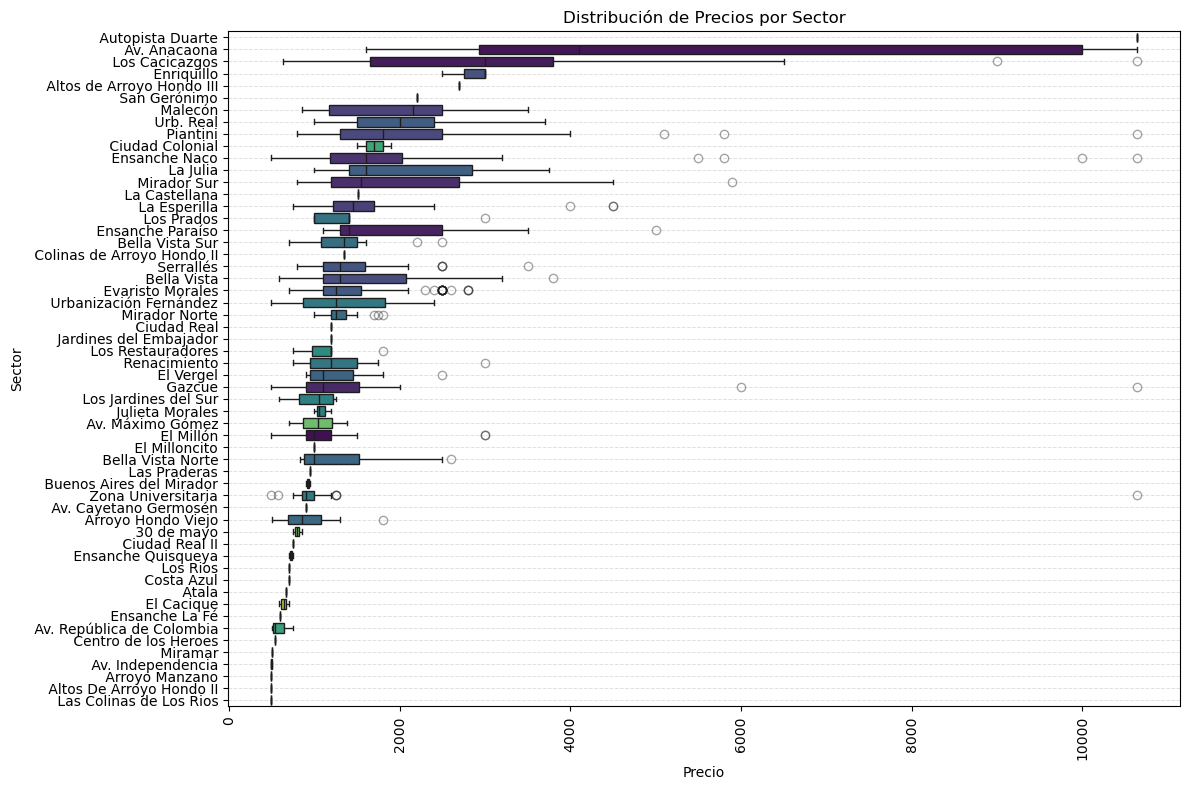

In [57]:
# Ordenar los sectores por el precio promedio
sector_order = df.groupby('Sector')['Precio'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sector', x='Precio', order=sector_order,hue='Sector',legend=False, palette='viridis',
            flierprops=dict(marker='o', color='grey', alpha=0.4)) 
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Sector')
plt.ylabel('Sector')
plt.xlabel('Precio')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.tight_layout()
plt.show()

Análisis de la Distribución de Precios por Sector

El gráfico muestra la variación de los precios de alquiler en diferentes sectores. Cada caja representa cómo se distribuyen los precios dentro de un sector, permitiendo ver qué tan altos o bajos pueden ser. Las líneas y puntos alrededor de las cajas indican precios que se alejan del promedio. Se pueden observar sectores con precios muy altos y otros con una variación de precios más ajustada, lo que ayuda a entender la diversidad de precios de alquiler en cada área.

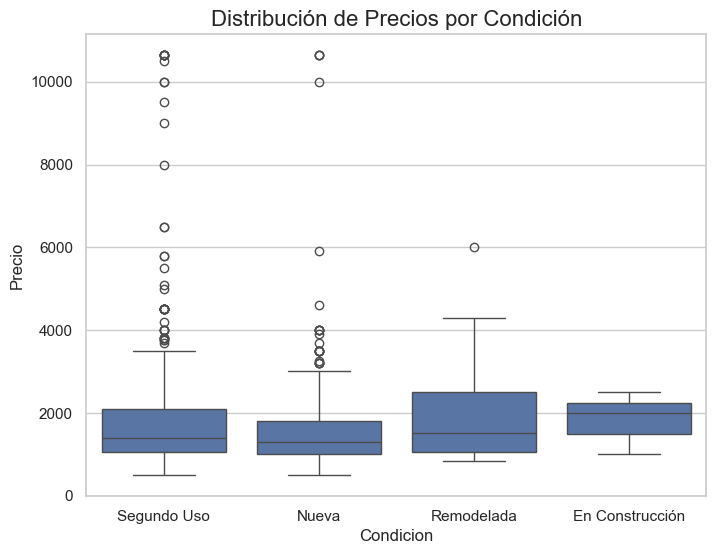

In [64]:

# Boxplot para comparar la distribución de los precios según la condición del inmueble
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condicion', y='Precio', data=df)
plt.title('Distribución de Precios por Condición', fontsize=16)
plt.show()

Análisis de la Distribución de Precios por Condición

El gráfico compara los precios de alquiler según la condición del inmueble: Segundo Uso, Nueva, Remodelada y En Construcción. Cada caja muestra cómo varían los precios dentro de cada categoría. Se observa que las propiedades remodeladas y de segundo uso tienden a tener precios más elevados en comparación con las nuevas y en construcción. Los puntos fuera de las cajas representan precios que se alejan del rango típico. Esto permite entender cómo la condición del inmueble influye en el precio del alquiler.

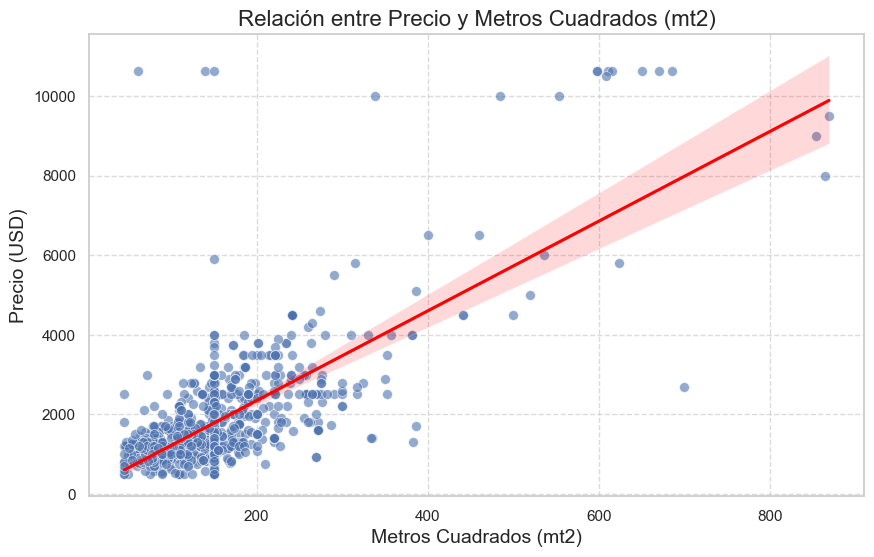

In [18]:
# Gráfico de dispersión mejorado para visualizar la relación entre Precio y mt2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mt2', y='Precio', data=df, alpha=0.6, s=50)  # s ajusta el tamaño de los puntos, alpha controla la transparencia
sns.regplot(x='mt2', y='Precio', data=df, scatter=False, color='red')  # Añadir la línea de regresión
plt.title('Relación entre Precio y Metros Cuadrados (mt2)', fontsize=16)
plt.xlabel('Metros Cuadrados (mt2)', fontsize=14)
plt.ylabel('Precio (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Rejilla con un estilo punteado
plt.show()

Relación entre Precio y Metros Cuadrados

El gráfico muestra cómo se relaciona el precio de alquiler con el tamaño de la propiedad en metros cuadrados (mt2). Cada punto azul representa una propiedad, y la línea roja indica la tendencia general: a mayor tamaño, mayor es el precio. La franja roja alrededor de la línea muestra la posible variabilidad de esta relación. Se observa que, aunque hay una tendencia clara de aumento del precio con el tamaño, existen propiedades que se salen de esta norma, con precios mucho más altos o más bajos de lo esperado para su tamaño.

## Anova
Realicemos una prueba Anova para determinar si existen diferencias significativas en los precios medios de las viviendas entre los diferentes sectores.

In [21]:
import scipy.stats as stats

# Crear un dataframe con solo los sectores y precios
df_anova = df[['Sector', 'Precio']]

# Realizar la prueba ANOVA
anova_result = stats.f_oneway(
    *[df_anova[df_anova['Sector'] == sector]['Precio'] for sector in df_anova['Sector'].unique()]
)

# Mostrar los resultados
print('Valor p:', anova_result.pvalue)

Valor p: 9.736167487653613e-58


### Interpretación del Resultado ANOVA
Dado que el valor p obtenido es 9.73e-58, que es significativamente menor a 0.05, se rechaza la hipótesis nula. Esto indica que SI existen diferencias significativas en los precios medios de las viviendas entre los diferentes sectores, lo que sugiere que el sector es un factor relevante para determinar el precio.



# **Insights y Conclusiones del Análisis EDA de Ofertas Inmobiliarias**

1. **Distribución de Precios:**

    * Los precios de las propiedades se concentran principalmente en un rango bajo, con algunas propiedades de lujo que presentan precios significativamente más altos.
    * Esto sugiere un mercado diverso, donde la mayoría de las ofertas son accesibles, pero también existen opciones exclusivas.
2. **Relación entre Metros Cuadrados y Precio:**

    * Se identificó una correlación positiva moderada entre el tamaño de la propiedad y su precio. Propiedades más grandes suelen tener precios más altos, como era de esperarse.
    * Sin embargo, hay algunas excepciones donde el precio no sigue esta tendencia, lo que indica la posible influencia de otros factores como la ubicación o características especiales.
3. **Impacto del Número de Habitaciones y Baños:**

    * No se detectó una correlación fuerte entre el precio y la cantidad de habitaciones o baños, lo cual sugiere que estos no son los principales determinantes del valor de una propiedad.
    * Factores como la ubicación y las amenidades adicionales parecen tener un mayor peso en la valoración de los inmuebles.
4. **Diferencias Significativas por Sector:**

    * La prueba ANOVA reveló que existen diferencias significativas en los precios medios de las propiedades entre distintos sectores, lo que confirma que el sector es un factor clave en la fijación del precio.
    * Esto puede orientar a compradores e inversores a enfocarse en ciertos sectores según su presupuesto y expectativas de rentabilidad.
5. **Amenidades como Ascensor y Seguridad:**

    * Un alto porcentaje de las propiedades cuenta con amenidades como ascensor y seguridad 24 horas, lo que sugiere que estos son estándares comunes en las zonas analizadas.
    * La presencia de estos servicios podría ser un atractivo importante para compradores interesados en comodidad y seguridad.
  
Estos insights proporcionan una visión clara de los factores que influyen en los precios y características de las propiedades, ayudando a identificar oportunidades de mercado y ajustar estrategias de compra o venta.